In [1]:
!pip install -q -U google-generativeai
!pip install rebound
!pip install matplotlib
!pip install scikit-learn

You should consider upgrading via the '/Users/shinnosukenoda/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/shinnosukenoda/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/shinnosukenoda/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/shinnosukenoda/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import google.generativeai as genai
import rebound
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import pandas as pd
import importlib
import sys
from PIL import Image

/Users/shinnosukenoda/opt/anaconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Define a function: simulate_randomly_speced_observations()
def simulate_randomly_speced_observations():
    times = np.array([26992.35119,149390.6603,161414.5792,177590.7252,209347.8044,215861.1914,246437.906,248699.7599,253178.2192,304987.7535,343181.6386,356282.8356,366797.1173,384888.0943,391041.1147,482240.634,496597.3815,521777.9887,553871.6612,654310.2496,666647.1354,713323.3642,747006.0851,764829.3764,768864.7054,778717.2294,858266.2077,869275.1871,880648.3247,893759.7578,919281.1426,922502.0137,980196.5666,994549.6353,1032117.928,1036796.297,1043648.963,1085932.279,1092307.545,1108852.494,1125819.723,1141697.309,1149125.048,1160679.719,1168570.464,1175828.14,1180323.903,1189924.243,1245735.388,1247176.846,1250027.465,1264373.401,1316989.466,1374027.616,1380252.075,1391828.319,1407077.173,1410338.424,1433651.687,1455906.297,1475673.44,1496088.705,1508950.972,1528694.033,1544836.125,1563044.64,1567447.133,1606300.516,1614443.731,1668100.205,1680262.526,1712619.984,1721292.048,1742895.744,1752145.848,1793501.002,1797008.367,1803623.257,1814682.142,1858299.879,1933126.494,1936760.85,1954937.669,1956820.405,1958550.538,1967057.916,1977576.997,1983995.608,1997145.573,2000169.216,2053846.417,2081186.093,2093525.566,2093557.21,2097553.805,2103826.617,2203966.423,2223088.469,2239354.93,2280061.841,2294765.969,2297717.042,2356559.43,2404349.099,2407506.59,2531356.506,2605355.342,2635187.136,2643319.09,2676013.712,2684512.266,2714734.112,2735111.527,2765810.095,2790913.195,2805612.644,2877759.951,2882923.288,2894263.023,2924111.072,2939188.015,2959108.756,3055169.021,3056453.636,3082761.297,3084120.57,3090023.084,3097937.733,3100407.344,3133534.367,3158200.82,3164446.11,3205825.201,3222235.199,3241574.666,3308282.229,3316136.534,3391563.262,3392076.389,3444085.435,3457724.765,3553538.269,3628458.492,3635473.255,3657206.558,3737747.25,3741486.237,3751798.02,3753150.883,3756717.522,3836387.017,3850408.262,3874076.676,3968894.968,3975536.084,3989630.929,3998157.138,4006893.85,4033529.667,4047110.347,4062618.23,4154810.243,4199630.701,4217268.704,4248784.84,4268190.54,4282763.981,4285291.822,4300567.847,4312978.252,4325242.842,4365331.422,4396922.475,4426669.839,4501360.621,4513257.88,4513629.545,4514464.969,4555975.655,4559106.359,4559854.579,4594916.949,4597059.508,4616488.53,4689721.348,4748746.479,4753604.143,4759824.902,4765856.318,4841322.596,4854241.429,4860549.868,4863509.153,4879382.204,4923520.815,4970975.034,4975949.52,4976285.643,4990584.86,4993757.11,5068940.642,5097703.125,5098903.832,5117107.674,5122729.866,5125618.424,5129612.588,5152312.442,5155136.233,5158037.712,5187165.751,5187572.319,5194113.991,5202924.333,5233256.04,5326789.745,5372905.965,5378294.702,5541016.864,5565236.267,5572708.334,5582421.574,5628002.871,5630727.263,5640881.59,5642522.463,5676154.765,5783671.729,5798999.711,5824123.623,5847969.138,5893457.8,5893539.45,5939533.111,5940248.069,6009574.574,6074012.328,6091058.078,6094884.838,6105007.345,6114073.61,6137029.146,6149618.31,6204605.673,6208268.688,6221130.162,6229919.511,6243521.003,6271001.193,6284158.276,6326123.802,6365370.966,6444485.159,6503949.901,6510152.668,6542815.109,6597924.745,6630163.824,6636265.367,6663276.253,6663522.105,6674944.303,6677297.821,6717421.426,6734216.728,6739872.983,6740073.623,6850458.505,6942471.456,6964224.441,6974664.299,7008922.877,7025408.511,7030109.999,7048846.357,7050969.439,7057553.764,7065445.691,7083103.923,7085679.842,7097472.797,7120117.243,7163739.854,7175965.016,7195147.26,7211382.973,7236443.036,7252327.368,7253254.969,7293541.229,7337325.365,7416852.546,7430851.067,7458268.041,7473122.008,7473235.811,7508319.074,7511859.398,7608391.829,7611558.784,7614447.906,7617557.515,7669900.407,7681506.444,7706727.798,7711677.382,7724330.673,7736985.136,7744222.108,7762621.649,7770539.701,7772014.84,7789098.06,8122594.31,8148299.384,8244070.841,8273850.09,8284945.669,8335801.632,8340008.283,8343281.946,8353400.189,8437540.066,8505916.877,8602779.165,8612681.728,8672188.01,8683334.262,8721772.938,8729816,8805489.381,8854652.612,8874330.674,8895169.888,8905727.03,8940697.813,8952702.497,9031011.837,9034288.672,9060028.291,9061710.903,9070318.665,9153394.745,9163668.459,9167631.512,9195291.528,9217577.103,9282959.804,9307040.27,9329921.984,9335492.417,9392251.878,9408498.129,9411211.867,9430257.131,9430683.523,9430715.372,9463864.206,9488469.781,9501231.072,9594276.486,9608798.335,9671113.821,9690170.012,9694887.887,9697229.895,9703331.529,9783070.744,9800847.281,9819095.701,9829069.472,9842957.342,9889459.341,9898592.402,9940425.775,9964497.163,10068579.72,10103029.67,10182463.83,10189709.54,10206761.41,10246099.01,10301089.81,10306068.51,10371897.11,10372349.97,10415838.61,10426203.12,10491339.77,10506740.45,10509797.15,10547336.7,10600734.16,10643388.71,10647134.32,10724029.16,10730023.83,10901948.64,10902304.22,10957898.84,10980592.39,11000151.99,11000397.15,11073248.41,11082449.09,11087803.98,11126995.43,11134339.84,11142649.05,11148144.24,11173488.17,11201965.73,11206934.33,11212928.69,11222642.16,11234080.46,11269002.15,11291439.34,11308694.1,11341614.77,11406650.85,11425968.5,11428139.49,11436694.02,11455082.39,11486527.11,11502168.88,11548375.97,11592248.01,11601037.53,11608293.56,11609463.94,11663076.61,11671735.16,11699882.34,11701899.42,11715768.26,11724114.48,11731187.52,11754595.89,11772262.43,11868826.71,11878437.17,11882783.77,11948456.89,11961571.2,11977533.26,11986625.53,12004656.23,12014037.84,12014816.14,12033716.31,12053976.36,12104566.74,12108994.9,12130884.02,12156673.94,12177265.75,12188770.55,12209233.24,12250527.48,12301297.47,12304199.01,12317772.24,12333282.38,12349607.41,12384008.19,12416615.55,12446294.26,12458904.02,12462155.94,12467611.6,12475332.12,12490041.74,12493975.6,12507433.9,12514574.93,12545006.32,12569150.77,12595451.11,12620860.64,12629406.41,12649477.07,12650983.19,12655087.25,12659982.98,12669238,12677577.93,12681164.07,12699865.5,12782273.91,12802736.54,12815931.77,12835611.23,12854379.83,12864519.05,12932342.05,12939164.79,12940970.06,12959273.38,12964160.48,12984934.6,12999837.47,13030623.04,13066776.8,13085929.67,13109968.76,13124893.38,13158817.28,13163391.94,13177956.97,13188112.81,13199776.63,13209147.74,13237635.77,13249144.94,13294636.94,13381370.71,13383240.27,13399628.13,13422108.55,13428735.48,13482585.25,13495221.97,13505548.87,13530350.4,13584134.9,13603156,13612906.15,13634026.46,13703751.88,13729542.86,13746339.88,13789061,13791321.52,13879836.31,13894330.96,13966766.59,13968075.67,13976418.77,13996097.34,14023736.47,14056792.78,14069192.6,14078361.24,14107782.43,14130419.44,14175108.87,14196468.17,14235547.58,14261229.58,14274502.75,14298840.35,14304145.34,14313585.16,14315970.85,14327922.75,14361733.81,14374024.05,14384343.29,14402071.49,14439996.32,14561980.95,14573223.96,14576661.74,14601107.19,14626100.38,14671348.58,14673687.94,14696315.13,14748973.37,14820621.53,14838170,14889916.64,14903747.21,14905880.64,14906630.37,14918994.62,14951287.01,14952101.37,14953761.1,14963962.45,14973349.9,14980259.05,15000194.63,15002319.22,15007946.98,15009962.83,15087303.58,15103988.45,15147325.98,15147764.92,15172577.63,15181080.77,15192410.66,15202153.74,15217851.42,15228794.81,15236888.06,15245561.29,15251788.41,15262922.57,15307812.15,15318221.99,15332339.99,15336340.41,15404583.93,15412340.12,15425968.09,15444264.16,15492834.99,15556242.5,15575338.53,15737866.12,15760450.86,15823523.14,15828032.92,15831397.58,15843224.94,15850726.42,15890117.15,15909098.8,15919104.22,15928919.64,15949779.84,15973168.66,15975789.65,15979102.55,15994984.37,16042178.25,16079117.94,16082340.7,16087890.88,16108878.15,16145802.04,16184993.15,16233690.37,16245024.53,16245417.28,16263567.65,16274383.35,16291516.51,16294714.14,16369121.47,16370558.27,16440125.96,16440744.42,16473406.77,16484554.79,16500355.37,16522177.16,16527151.67,16601576.48,16618409.05,16659832.35,16672932.52,16675588.88,16717701.46,16738344.03,16756500.83,16776325.48,16779942.73,16805717.35,16852389.27,16882797.64,16900244.21,16903748.99,16932190.32,16943591.11,16949351.86,16986922.1,17041132.8,17050524.55,17059450.64,17062947.63,17063418.9,17068958.61,17078234.61,17104376.99,17118359.44,17131407.76,17153333.74,17160468.95,17176857.99,17182463.68,17191302.27,17224525.15,17233255.79,17241910.55,17275346.66,17303137.89,17354831.57,17358983.28,17363772.03,17420245.88,17466104.6,17492651.67,17513399.58,17566586.95,17587198.71,17717272.22,17721613.31,17748823.43,17774923.54,17808184.52,17822919.71,17839110.04,17844663.18,17876369.62,17927120.1,17961595.18,18182711.06,18217634.51,18250292.77,18259996.4,18288486.64,18330780.25,18338849.22,18365523.85,18407518.38,18423370.69,18441394.92,18476148.45,18480858.79,18501762.71,18504155.28,18564099.59,18592451.69,18596265.5,18634950.27,18650068.62,18702599.33,18704106.17,18738374.29,18767523.81,18769150.82,18789802.26,18833722.99,18837420.25,18934650.04,18941393.76,18995285,19037196.28,19073784.12,19108601.75,19145575.09,19148426.83,19164439.52,19230353.96,19258456.74,19267485.3,19315346.96,19321056.45,19321345.99,19336853.85,19359656.78,19363314.76,19367853.33,19384212.21,19402229.4,19410905.04,19471973.45,19517935.74,19535510.76,19573207.42,19590541.71,19646291.85,19692986.32,19704317.31,19712870.49,19737180.46,19769626.35,19800862.3,19802366.28,19830155.57,19830224.28,19835940.62,19836972.69,19837661.99,19840000.43,19864491.38,19871406.87,19890008.56,19907136.13,19949537.13,19992822.07,20055140.14,20063467.61,20090824.27,20124879.49,20189740.44,20195843.92,20244325.72,20254720.01,20255669.62,20291399.25,20306203.31,20320777.73,20378735.23,20389865.59,20432318.99,20438242.95,20540993.52,20545334.8,20621350.73,20629774.08,20650785.23,20677677.23,20679269.66,20734535.32,20749949.61,20806570.22,20822927.74,20836009.88,20861900.75,20873541.63,20880672.74,20890007.85,20891470.8,20908903.03,20914135.05,20960468.62,20964954.66,20996423.68,21032440.05,21151043.09,21187481.2,21188827.42,21277299.6,21327010.5,21373735.72,21387434.17,21430197.08,21513580.85,21514189.58,21540865.59,21573769.31,21640121.51,21647866.22,21661954.8,21672296.02,21759398.28,21765840.13,21827629.75,21838944.33,21872106,21916060.25,22069010.59,22070886.03,22103694.75,22104809.49,22127932.97,22161221.96,22190671.21,22202767.37,22204447.34,22235723.28,22308332.32,22313248.07,22331033.89,22334518.12,22344143.43,22350967.75,22357051.32,22367621.05,22379273.9,22455894.03,22456845.86,22486683.63,22502956.94,22515021.28,22516509.24,22530421.23,22556809.99,22560378.47,22611124.17,22652289.04,22682153.35,22706449.02,22718728.86,22721642.96,22735098.36,22788266.58,22813284.81,22827208.78,22869575.9,22921037.76,22922596.55,22946076.11,22947950.27,22949493.99,22979301.34,23009160.2,23012864.38,23093359.17,23204783.09,23273215.75,23278655.97,23294824.39,23312253.42,23349698.96,23416196.58,23443830.43,23444428.8,23466294.96,23511576.64,23515729.83,23542734.34,23549315.87,23577110,23584682.08,23602915.66,23619039.73,23629070.94,23763638.98,23764808.92,23769641.06,23777004.82,23787962.25,23796746.99,23802374.17,23809446.14,23819560.79,23830110.6,23830816.14,23844648.38,23859607.01,23882054.37,23924309.06,23964936.8,23969015.69,23978060.68,23995723.71,23997864.09,24039014.29,24070916.27,24114319.3,24144150.01,24180747.76,24203770.99,24291462.07,24300236.04,24311838.35,24346824.15,24367344.61,24404438.11,24414681.75,24435571.8,24457781.7,24462508.18,24521564.96,24533137.27,24535265.62,24540887.48,24541314.66,24587221.71,24597823.44,24622340.4,24629010.88,24630696,24636094.47,24667630.04,24702337,24770265.26,24774527.96,24807705.88,24842807.55,24855070.48,24878569.01,24882173.85,24897453.84,24917708.34,24958096.86,24977110.98,24994420.53,25008944.86,25038132.93,25051563.8,25053047.61,25156264.18,25168418.11,25179758.29,25240693.45,25261651.96,25320915.1,25325319.92,25331434.85,25353572.34,25358581.49,25366148.81,25389315.13,25461525.89,25532903.42,25667304.05,25713965.6,25751185.45,25780369.23,25821301.33,25861936.45,25893156.78])
    RVs = np.array([5.24E+01,4.14E+02,4.17E+02,4.24E+02,5.39E+02,5.02E+02,6.06E+02,6.29E+02,6.46E+02,7.22E+02,8.01E+02,8.00E+02,8.03E+02,8.81E+02,8.15E+02,9.37E+02,9.52E+02,9.41E+02,9.27E+02,9.14E+02,9.27E+02,8.79E+02,8.38E+02,8.05E+02,8.22E+02,8.29E+02,6.83E+02,6.81E+02,6.31E+02,6.24E+02,5.50E+02,5.66E+02,4.29E+02,4.23E+02,3.49E+02,3.50E+02,3.31E+02,2.40E+02,1.97E+02,2.01E+02,1.47E+02,1.20E+02,1.49E+02,1.29E+02,7.86E+01,9.17E+01,9.27E+01,5.82E+01,-2.67E+00,7.73E+00,1.36E+01,-1.93E+01,-6.32E+01,-6.14E+01,-1.18E+02,-1.21E+02,-8.51E+01,-1.14E+02,-1.06E+02,-1.34E+02,-9.67E+01,-1.20E+02,-1.11E+02,-1.08E+02,-4.77E+01,-3.98E+01,-1.08E+02,-4.24E+01,-7.46E+01,-7.07E+00,7.24E-01,2.25E+01,1.93E+01,1.46E+01,5.64E+00,4.62E+01,8.16E+01,9.13E+00,1.03E+02,7.14E+01,1.06E+02,1.41E+02,1.32E+02,1.13E+02,1.29E+02,1.02E+02,1.13E+02,1.06E+02,1.21E+02,1.23E+02,9.74E+01,7.30E+01,1.02E+02,9.68E+01,7.92E+01,1.16E+02,7.63E+00,-8.43E+00,-3.32E+01,-1.12E+02,-6.78E+01,-9.68E+01,-1.75E+02,-2.33E+02,-2.24E+02,-4.43E+02,-5.83E+02,-6.21E+02,-6.41E+02,-6.75E+02,-7.07E+02,-7.38E+02,-7.67E+02,-7.99E+02,-8.47E+02,-9.12E+02,-9.89E+02,-9.73E+02,-9.69E+02,-1.01E+03,-1.02E+03,-1.01E+03,-9.84E+02,-9.46E+02,-9.41E+02,-9.28E+02,-9.25E+02,-9.18E+02,-8.81E+02,-8.69E+02,-8.33E+02,-7.91E+02,-7.48E+02,-7.01E+02,-6.33E+02,-4.78E+02,-4.54E+02,-2.74E+02,-2.55E+02,-1.14E+02,-6.99E+01,1.64E+02,3.67E+02,3.39E+02,3.69E+02,5.42E+02,6.28E+02,6.07E+02,5.96E+02,6.18E+02,7.41E+02,7.53E+02,7.66E+02,8.50E+02,8.91E+02,8.65E+02,8.81E+02,8.96E+02,9.23E+02,9.05E+02,9.02E+02,9.18E+02,8.85E+02,8.31E+02,7.85E+02,8.18E+02,7.78E+02,7.78E+02,6.98E+02,7.26E+02,7.11E+02,6.17E+02,5.70E+02,5.08E+02,3.25E+02,3.05E+02,2.95E+02,3.01E+02,2.09E+02,1.98E+02,1.66E+02,1.17E+02,1.38E+02,7.71E+01,-9.90E+00,-2.58E+01,-3.57E+01,-3.54E+01,-1.51E+01,-4.54E+01,-1.61E+01,1.01E+01,-4.37E+00,5.96E+00,9.19E+00,3.93E+01,7.16E+01,7.27E+01,7.97E+01,7.81E+01,1.31E+02,1.60E+02,1.61E+02,1.61E+02,1.69E+02,1.74E+02,1.29E+02,2.02E+02,2.00E+02,1.85E+02,1.85E+02,1.59E+02,2.29E+02,2.47E+02,2.42E+02,2.58E+02,2.62E+02,2.11E+02,1.79E+02,1.82E+02,1.96E+02,1.69E+02,1.13E+02,1.09E+02,1.52E+02,1.22E+02,6.23E+01,-3.81E+01,-9.03E+01,-9.35E+01,-1.33E+02,-2.25E+02,-2.21E+02,-3.14E+02,-3.26E+02,-4.66E+02,-6.05E+02,-5.81E+02,-6.49E+02,-6.52E+02,-7.08E+02,-7.62E+02,-7.76E+02,-9.32E+02,-9.41E+02,-9.78E+02,-9.80E+02,-9.97E+02,-1.05E+03,-1.04E+03,-1.10E+03,-1.11E+03,-1.08E+03,-1.01E+03,-1.06E+03,-9.67E+02,-8.53E+02,-7.86E+02,-7.82E+02,-7.22E+02,-7.16E+02,-7.06E+02,-6.86E+02,-6.01E+02,-5.48E+02,-5.58E+02,-5.43E+02,-2.84E+02,-9.69E+01,-3.17E+01,-3.58E+00,6.06E+01,1.01E+02,1.01E+02,1.05E+02,1.91E+02,1.59E+02,1.78E+02,2.17E+02,2.12E+02,2.38E+02,2.81E+02,3.23E+02,3.86E+02,3.96E+02,4.20E+02,4.31E+02,4.79E+02,4.85E+02,5.37E+02,5.87E+02,6.61E+02,6.51E+02,6.68E+02,6.48E+02,6.80E+02,6.69E+02,5.89E+02,6.24E+02,6.22E+02,5.92E+02,5.80E+02,5.31E+02,5.15E+02,4.83E+02,4.92E+02,4.27E+02,4.19E+02,4.32E+02,4.07E+02,3.90E+02,4.10E+02,3.06E+02,8.20E+01,1.51E+02,2.81E+02,2.56E+02,3.07E+02,3.51E+02,3.33E+02,3.45E+02,3.97E+02,4.82E+02,5.46E+02,5.69E+02,5.83E+02,5.74E+02,6.06E+02,5.49E+02,5.68E+02,5.74E+02,5.56E+02,4.86E+02,5.09E+02,4.93E+02,4.81E+02,4.26E+02,3.92E+02,3.46E+02,3.62E+02,3.64E+02,3.56E+02,1.49E+02,1.69E+02,1.52E+02,1.31E+02,8.12E+01,-8.05E+01,-1.58E+02,-1.87E+02,-1.98E+02,-4.07E+02,-4.54E+02,-4.74E+02,-5.18E+02,-5.65E+02,-5.14E+02,-6.50E+02,-7.18E+02,-7.79E+02,-1.01E+03,-1.00E+03,-1.10E+03,-1.07E+03,-1.06E+03,-1.07E+03,-1.07E+03,-1.06E+03,-1.01E+03,-1.00E+03,-9.96E+02,-9.57E+02,-9.27E+02,-9.33E+02,-8.21E+02,-8.08E+02,-6.60E+02,-5.54E+02,-4.34E+02,-4.44E+02,-3.91E+02,-4.28E+02,-2.73E+02,-2.88E+02,-1.72E+02,-1.87E+02,-9.87E+01,-9.05E+01,2.07E-01,3.43E+01,1.31E+01,6.24E+01,1.40E+02,1.74E+02,1.15E+02,2.17E+02,2.34E+02,2.60E+02,2.44E+02,1.94E+02,1.30E+02,1.12E+02,1.28E+02,5.05E+01,5.25E+01,5.69E+01,-1.13E+01,-2.85E+01,-7.71E+01,-7.92E+01,-4.50E+01,-9.53E+01,-8.53E+01,-1.13E+02,-7.71E+01,-1.35E+02,-1.44E+02,-1.24E+02,-1.43E+02,-8.22E+01,-3.96E+01,-1.18E+01,2.98E+01,1.19E+00,6.15E+01,1.24E+02,1.53E+02,2.27E+02,3.17E+02,3.14E+02,3.91E+02,3.71E+02,4.48E+02,4.49E+02,5.26E+02,4.92E+02,5.28E+02,5.40E+02,5.61E+02,5.72E+02,6.17E+02,7.38E+02,7.87E+02,7.76E+02,8.07E+02,8.16E+02,8.29E+02,8.04E+02,8.35E+02,8.35E+02,8.47E+02,8.62E+02,8.63E+02,8.93E+02,9.14E+02,8.91E+02,8.99E+02,8.63E+02,8.58E+02,8.96E+02,8.32E+02,8.27E+02,7.87E+02,7.69E+02,7.75E+02,7.42E+02,6.87E+02,6.69E+02,6.26E+02,5.81E+02,5.69E+02,5.46E+02,5.38E+02,5.21E+02,5.17E+02,5.01E+02,4.56E+02,4.00E+02,3.31E+02,2.66E+02,1.53E+02,1.54E+02,9.90E+01,5.16E+01,4.50E+01,4.04E+01,-1.29E+01,-2.02E+01,-2.18E+01,-7.82E+01,-3.89E+02,-4.03E+02,-4.90E+02,-5.08E+02,-5.38E+02,-5.88E+02,-7.38E+02,-7.24E+02,-7.04E+02,-7.32E+02,-7.61E+02,-8.03E+02,-8.19E+02,-8.02E+02,-8.41E+02,-8.14E+02,-8.23E+02,-8.09E+02,-7.94E+02,-8.10E+02,-7.56E+02,-7.77E+02,-7.66E+02,-7.94E+02,-7.74E+02,-7.53E+02,-6.88E+02,-6.07E+02,-6.03E+02,-6.25E+02,-5.86E+02,-5.44E+02,-5.06E+02,-4.57E+02,-4.79E+02,-4.62E+02,-3.95E+02,-4.01E+02,-3.57E+02,-3.58E+02,-2.66E+02,-2.72E+02,-2.14E+02,-2.10E+02,-1.99E+02,-1.46E+02,-1.31E+02,-8.92E+01,-9.80E+01,-9.39E+01,-8.87E+01,-4.57E+01,-8.23E+01,-5.41E+01,-5.12E+01,-6.23E+01,-9.25E+01,-1.10E+02,-1.17E+02,-1.57E+02,-1.30E+02,-1.88E+02,-2.30E+02,-1.91E+02,-1.95E+02,-2.08E+02,-2.65E+02,-2.37E+02,-2.68E+02,-3.22E+02,-3.15E+02,-3.71E+02,-4.95E+02,-4.57E+02,-4.59E+02,-4.80E+02,-4.25E+02,-4.00E+02,-3.94E+02,-4.11E+02,-2.77E+02,-1.23E+02,-1.39E+02,2.78E+01,3.64E+01,6.20E+01,3.53E+01,1.16E+02,1.91E+02,1.94E+02,1.72E+02,1.69E+02,1.60E+02,2.25E+02,2.85E+02,2.39E+02,2.82E+02,3.03E+02,4.46E+02,4.95E+02,5.72E+02,6.06E+02,6.01E+02,6.36E+02,6.77E+02,6.91E+02,7.01E+02,7.48E+02,7.73E+02,7.54E+02,7.73E+02,7.93E+02,8.77E+02,8.27E+02,9.30E+02,8.71E+02,9.59E+02,9.89E+02,9.40E+02,1.00E+03,1.02E+03,1.02E+03,1.02E+03,9.03E+02,8.72E+02,8.01E+02,7.68E+02,7.57E+02,7.61E+02,7.15E+02,6.69E+02,6.23E+02,5.91E+02,5.42E+02,4.88E+02,4.36E+02,4.34E+02,4.24E+02,3.98E+02,1.93E+02,1.36E+02,1.55E+02,9.88E+01,7.23E+01,-4.59E+01,-1.58E+02,-2.64E+02,-3.13E+02,-3.20E+02,-3.12E+02,-3.61E+02,-4.21E+02,-4.50E+02,-5.17E+02,-5.33E+02,-5.72E+02,-5.87E+02,-5.95E+02,-5.94E+02,-6.01E+02,-6.07E+02,-6.17E+02,-6.38E+02,-6.41E+02,-6.06E+02,-5.84E+02,-5.72E+02,-5.30E+02,-5.56E+02,-5.09E+02,-4.54E+02,-5.13E+02,-4.49E+02,-4.38E+02,-3.95E+02,-4.32E+02,-3.75E+02,-3.81E+02,-3.56E+02,-3.42E+02,-3.38E+02,-3.07E+02,-2.90E+02,-2.81E+02,-2.51E+02,-2.57E+02,-2.64E+02,-2.45E+02,-2.64E+02,-2.26E+02,-2.38E+02,-2.00E+02,-2.15E+02,-1.72E+02,-1.82E+02,-2.25E+02,-1.82E+02,-1.54E+02,-1.66E+02,-1.77E+02,-1.52E+02,-1.17E+02,-1.55E+02,-1.38E+02,-1.72E+02,-2.00E+02,-1.91E+02,-1.87E+02,-2.40E+02,-2.53E+02,-3.76E+02,-3.99E+02,-4.32E+02,-4.31E+02,-4.66E+02,-4.69E+02,-5.07E+02,-5.56E+02,-5.33E+02,-5.70E+02,-6.34E+02,-4.32E+02,-3.31E+02,-2.98E+02,-2.90E+02,-2.53E+02,-1.38E+02,-9.60E+01,-6.65E+01,7.27E+01,1.26E+02,1.37E+02,2.31E+02,2.55E+02,3.35E+02,2.87E+02,4.38E+02,5.29E+02,4.90E+02,6.16E+02,6.12E+02,7.24E+02,7.33E+02,8.11E+02,8.61E+02,8.73E+02,8.49E+02,9.33E+02,9.65E+02,1.04E+03,1.05E+03,1.05E+03,1.07E+03,1.06E+03,9.99E+02,1.03E+03,1.00E+03,9.82E+02,9.18E+02,8.72E+02,8.23E+02,7.33E+02,7.52E+02,7.28E+02,7.16E+02,6.78E+02,6.71E+02,6.47E+02,6.29E+02,5.63E+02,5.64E+02,4.44E+02,3.06E+02,2.91E+02,1.24E+02,1.25E+02,-3.90E+01,-1.28E+02,-1.30E+02,-1.87E+02,-2.03E+02,-2.72E+02,-3.41E+02,-3.63E+02,-4.02E+02,-4.03E+02,-4.26E+02,-4.05E+02,-3.92E+02,-4.05E+02,-4.70E+02,-4.28E+02,-4.86E+02,-5.07E+02,-5.58E+02,-6.15E+02,-5.72E+02,-6.24E+02,-5.72E+02,-6.38E+02,-5.60E+02,-5.50E+02,-4.84E+02,-5.23E+02,-5.10E+02,-4.67E+02,-4.47E+02,-4.44E+02,-3.69E+02,-4.05E+02,-3.42E+02,-2.98E+02,-2.20E+02,-2.02E+02,-1.80E+02,-1.78E+02,-1.63E+02,-2.15E+02,-1.61E+02,-1.38E+02,-1.63E+02,-1.81E+02,-1.66E+02,-1.65E+02,-1.92E+02,-2.18E+02,-1.71E+02,-1.92E+02,-2.05E+02,-1.80E+02,-2.27E+02,-2.41E+02,-2.36E+02,-2.49E+02,-3.26E+02,-3.65E+02,-3.79E+02,-4.04E+02,-5.11E+02,-4.91E+02,-5.31E+02,-5.16E+02,-5.38E+02,-5.46E+02,-5.45E+02,-5.57E+02,-5.33E+02,-4.35E+02,-4.82E+02,-4.61E+02,-4.28E+02,-2.47E+02,-3.05E+02,-1.86E+02,-1.51E+02,-6.36E+01,2.72E+01,4.40E+02,4.45E+02,5.63E+02,5.26E+02,5.94E+02,6.91E+02,7.47E+02,7.99E+02,7.53E+02,8.70E+02,9.72E+02,9.50E+02,1.02E+03,9.90E+02,1.01E+03,9.87E+02,1.01E+03,1.04E+03,1.05E+03,1.06E+03,1.05E+03,1.05E+03,1.09E+03,1.07E+03,1.04E+03,1.04E+03,1.04E+03,1.05E+03,9.83E+02,9.74E+02,9.28E+02,9.23E+02,9.00E+02,8.74E+02,8.40E+02,7.96E+02,7.36E+02,6.93E+02,6.37E+02,5.33E+02,5.01E+02,4.89E+02,4.59E+02,4.69E+02,3.85E+02,3.29E+02,3.51E+02,1.35E+02,-9.82E+01,-2.80E+02,-2.91E+02,-3.05E+02,-3.30E+02,-3.90E+02,-5.25E+02,-5.21E+02,-5.17E+02,-5.67E+02,-5.89E+02,-5.73E+02,-5.41E+02,-5.95E+02,-5.85E+02,-6.10E+02,-5.53E+02,-5.85E+02,-5.74E+02,-4.19E+02,-4.06E+02,-3.62E+02,-3.89E+02,-3.95E+02,-3.85E+02,-3.47E+02,-3.90E+02,-3.16E+02,-3.38E+02,-3.40E+02,-2.76E+02,-2.75E+02,-2.42E+02,-1.78E+02,-1.66E+02,-1.72E+02,-1.60E+02,-1.80E+02,-1.08E+02,-1.13E+02,-1.13E+02,-9.51E+01,-1.18E+02,-1.37E+02,-1.26E+02,-1.75E+02,-1.88E+02,-2.18E+02,-2.27E+02,-2.59E+02,-2.81E+02,-2.80E+02,-2.77E+02,-3.13E+02,-3.17E+02,-3.46E+02,-4.02E+02,-3.77E+02,-3.74E+02,-4.01E+02,-4.17E+02,-4.47E+02,-4.63E+02,-4.75E+02,-4.83E+02,-4.73E+02,-5.05E+02,-5.31E+02,-5.79E+02,-5.71E+02,-6.11E+02,-5.64E+02,-6.08E+02,-6.10E+02,-6.27E+02,-6.43E+02,-6.80E+02,-6.33E+02,-6.46E+02,-6.36E+02,-6.50E+02,-6.28E+02,-6.49E+02,-6.60E+02,-5.36E+02,-5.21E+02,-5.18E+02,-4.31E+02,-3.60E+02,-2.39E+02,-2.17E+02,-1.78E+02,-1.71E+02,-1.07E+02,-1.34E+02,-4.89E+01,1.98E+02,4.64E+02,8.05E+02,8.64E+02,9.07E+02,9.03E+02,9.79E+02,9.85E+02,1.02E+03])
    
    # Return RVs and times
    return RVs, times

In [5]:
def set_up_Gemini():
    # Declare a variable (myapi) and assign ""
    myapi = ""
    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    # myapi = myapi + google_drive_path

    # Open myapi.txt as read_file
    with open(myapi + "myapi.txt") as read_file:
        myapi = read_file.read()

    os.environ['API_KEY'] = myapi
    genai.configure(api_key=os.environ["API_KEY"])

In [6]:
# Defina a function: send_prompt(count, max_r_squared)
def send_prompt(count, max_r_squared):
    # Declare a variable ask_question and assign ""
    ask_question = ""

    # Declare a variable file_name and assign ""
    file_name = ""

    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    model = genai.GenerativeModel("gemini-2.0-flash")

    if (count == 0):
        # file = open(google_drive_path + "Prompt_1.txt", "r")
        file = open("Prompt_1.txt", "r")

        # Declare a variable (ask_questoin) and invoke file.read()
        ask_question = file.read()

        # Close the file
        file.close()

        # Send a prompt to Gemini
        # response = model.generate_content(ask_question)
        response = model.generate_content(
            contents=[
                ask_question,
                # Image.open(google_drive_path + "rv_curve.png")
                Image.open("rv_curve.png")
            ],
            generation_config=genai.GenerationConfig(
            temperature = 0
            # top_p = 0.99,
            # top_k = 0,
            # max_output_tokens = 4096
            )
        )

        response_text = response.text

        trimmed_code = "\n".join(x for x in response_text.splitlines() if "```" not in x)

        file_name = f"myfile_{count}.py"

        # f = open(google_drive_path + file_name, "w")
        f = open(file_name, "w")

        current_directory = os.getcwd()

        # f = open(google_drive_path + file_name, "w")
        f = open(file_name, "w")
        f.write(trimmed_code)
        f.close()

        #open and read the file after the overwriting:
        # f = open(google_drive_path + file_name, "r")
        f = open(file_name, "r")
        # print(f.read())

    else:
        ask_question = '''Here is the result.
        Your code generated the fitted curved and correctly returned fitted_rv_curve. Great!
        However, the curvefitting could be much better.

        Keep the structure of the code such as
            the name of the method, 
            the only 1 return value (fitted_rv_curve), or
            printing parameters such as the mass of the planet and the orbital period
        and modify the mothod so that it performs better curve fitting.

        Note: Write the entire method def estimate_planet_mass(times, RVs). 
        Do not write code partially even though you write the exact same code for some parts.

        Note 2: Just as before, in your code, print K, the mass of the planet, and the orbital period as well.
        Do not forget to return fitted_rv_curve.
        '''

        # file = open(google_drive_path + "Prompt_1.txt", "r")
        file = open("Prompt_1.txt", "r")

        # Declare a variable (ask_questoin) and invoke file.read()
        additional_question = file.read()

        askquestion = ask_question + additional_question

        # Close the file
        file.close()
        
        # Send a prompt to Gemini
        # response = model.generate_content(ask_question)
        response = model.generate_content(
            contents=[
                ask_question,
                # Image.open(google_drive_path + "rv_curve.png")
                Image.open(f"plot_{count}.png")
            ],
            generation_config=genai.GenerationConfig(
            temperature = 0
            # top_p = 0.99,
            # top_k = 0,
            # max_output_tokens = 4096
            )
        )

        response_text = response.text

        # print(response_text)

        trimmed_code = "\n".join(x for x in response_text.splitlines() if "```" not in x)

        file_name = f"myfile_{count}.py"

        # f = open(google_drive_path + file_name, "w")
        f = open(file_name, "w")

        current_directory = os.getcwd()

        # f = open(google_drive_path + file_name, "w")
        f = open(file_name, "w")
        f.write(trimmed_code)
        f.close()

        #open and read the file after the overwriting:
        # f = open(google_drive_path + file_name, "r")
        f = open(file_name, "r")
        # print(f.read())

    return file_name

In [7]:
def send_none_prompt(count):
    # Declare a variable ask_question and assign ""
    ask_question = ""

    # Declare a variable file_name and assign ""
    file_name = ""

    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    model = genai.GenerativeModel("gemini-2.0-flash")
    
    ask_question = "In your code, the rv_calculated returned None. Fix the code.\nNote: write the entire code. Do not omit the code even though your part of your code is exact the same as before."
    
    # Send a prompt to Gemini
    # response = model.generate_content(ask_question)
    response = model.generate_content(
        contents=[
            ask_question,
            # Image.open(google_drive_path + "rv_curve.png")
            Image.open("rv_curve.png")
        ],
        generation_config=genai.GenerationConfig(
        temperature = 0
        # top_p = 0.99,
        # top_k = 0,
        # max_output_tokens = 4096
        )
    )

    response_text = response.text

    # print(response_text)

    trimmed_code = "\n".join(x for x in response_text.splitlines() if "```" not in x)

    file_name = f"myfile_{count}.py"

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")

    current_directory = os.getcwd()

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")
    f.write(trimmed_code)
    f.close()

    #open and read the file after the overwriting:
    # f = open(google_drive_path + file_name, "r")
    f = open(file_name, "r")
    # print(f.read())

    return file_name

In [8]:
def delete_file(file_name):
    # Delete myfile.py
    if os.path.exists(file_name):
        # Remove the file: file_name
        os.remove(file_name)
    #else:
        # print("The file does not exist: " + str(file_name))

In [9]:
def calculate_mass_of_planet(count, m_planet, one_time_flag):
    # Declare a variable ask_question and assign ""
    ask_question = ""

    # Declare a variable file_name and assign ""
    file_name = ""

    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    model = genai.GenerativeModel("gemini-2.0-flash")

    # file = open(google_drive_path + "Prompt_2.txt", "r")
    file = open("Prompt_2.txt", "r")

    ask_question = ""

    if (not one_time_flag):
        if (m_planet > 1.0):
            ask_question = f"The calculated value is {m_planet} [msun] which is greater than 1.0 [msun]."

        elif (m_planet < 0.0):
            ask_question = f"The calculated value is {m_planet} which is less than 0.0 [msun]."
        else:
            ask_question = f"The calculated value is {m_planet} [msun]."
          
        ask_question = ask_question + '''The calculated value is not right.
        Modify the mothod.
        
        Be careful when you rearrage the equation from the Kepler's 3rd Law.
        Be careful about the unit conversion.
        Also, do not make things too complex than it should not be.'''

    # Declare a variable (ask_questoin) and invoke file.read()
    ask_question = ask_question + file.read()

    # Close the file
    file.close()

    # Send a prompt to Gemini
    # response = model.generate_content(ask_question)
    response = model.generate_content(
        contents=[
            ask_question
            # Image.open(google_drive_path + "rv_curve.png")
            # Image.open("rv_curve.png")
        ],
        generation_config=genai.GenerationConfig(
        temperature = 0
        # top_p = 0.99,
        # top_k = 0,
        # max_output_tokens = 4096
        )
    )

    response_text = response.text

    trimmed_code = "\n".join(x for x in response_text.splitlines() if "```" not in x)

    file_name = f"myfile_{count}.py"

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")

    current_directory = os.getcwd()

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")
    f.write(trimmed_code)
    f.close()

    #open and read the file after the overwriting:
    # f = open(google_drive_path + file_name, "r")
    f = open(file_name, "r")
    # print(f.read())

    return file_name

In [10]:
def calculate_mass_of_planet(count, m_planet, one_time_flag):
    # Declare a variable ask_question and assign ""
    ask_question = ""

    # Declare a variable file_name and assign ""
    file_name = ""

    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    model = genai.GenerativeModel("gemini-2.0-flash")

    # file = open(google_drive_path + "Prompt_2.txt", "r")
    file = open("Prompt_2.txt", "r")

    ask_question = ""

    if (not one_time_flag):
        if (m_planet > 1.0):
            ask_question = f"The calculated value is {m_planet} [msun] which is greater than 1.0 [msun]."

        elif (m_planet < 0.0):
            ask_question = f"The calculated value is {m_planet} which is less than 0.0 [msun]."
        else:
            ask_question = f"The calculated value is {m_planet} [msun]."
          
        ask_question = ask_question + '''The calculated value is not right.
        Modify the mothod.
        
        Be careful when you rearrage the equation from the Kepler's 3rd Law.
        Be careful about the unit conversion.
        Also, do not make things too complex than it should not be.'''

    # Declare a variable (ask_questoin) and invoke file.read()
    ask_question = ask_question + file.read()

    # Close the file
    file.close()

    # Send a prompt to Gemini
    # response = model.generate_content(ask_question)
    response = model.generate_content(
        contents=[
            ask_question
            # Image.open(google_drive_path + "rv_curve.png")
            # Image.open("rv_curve.png")
        ],
        generation_config=genai.GenerationConfig(
        temperature = 0
        # top_p = 0.99,
        # top_k = 0,
        # max_output_tokens = 4096
        )
    )

    response_text = response.text

    trimmed_code = "\n".join(x for x in response_text.splitlines() if "```" not in x)

    file_name = f"myfile_{count}.py"

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")

    current_directory = os.getcwd()

    # f = open(google_drive_path + file_name, "w")
    f = open(file_name, "w")
    f.write(trimmed_code)
    f.close()

    #open and read the file after the overwriting:
    # f = open(google_drive_path + file_name, "r")
    f = open(file_name, "r")
    # print(f.read())

    return file_name

In [11]:
def send_end_prompt():
    # Declare a variable ask_question and assign ""
    ask_question = ""

    model = genai.GenerativeModel("gemini-2.0-flash")

    ask_question = "You performed tasks correctly! Great job :)"

    # Send a prompt to Gemini
    # response = model.generate_content(ask_question)
    response = model.generate_content(
        contents=[
            ask_question
            # Image.open(google_drive_path + "rv_curve.png")
            # Image.open("rv_curve.png")
        ],
        generation_config=genai.GenerationConfig(
        temperature = 0
        # top_p = 0.99,
        # top_k = 0,
        # max_output_tokens = 4096
        )
    )

    response_text = response.text

    # print(response_text)  

In [12]:
def calculate_m_planet_manually(period, K):
    # Gravitational constant
    G = 6.674e-11
    
    # Solar mass in kg
    msun = 1.989e30
    
    # Star mass in kg (1 solar mass)
    m_star = 1 * msun

    # Calculate the semi-major-axis.
    a = ((G*(m_star)*period**2)/(4*np.pi**2))**(1/3)

    # Calculate the mass of planet in [kg].
    m_planet_kg = (K * period * m_star)/(2*np.pi*a)
    
    # Convert mass to solar masses
    m_planet_msun = m_planet_kg / msun

    # Return m_planet_msun
    return m_planet_msun

In [13]:
def main():
    # google_drive_path = "./drive/MyDrive/Colab Notebooks/Pipeline_One_Star_One_Planet/"

    # Invoke a function: set_up_Gemini()
    set_up_Gemini()

    # Declare variables (RVs, times) and invoke a function: simulate_randomly_speced_observations(sim)
    RVs, times = simulate_randomly_speced_observations()

    # Declare a variable (max_r_squared) and assign 0.0
    max_r_squared = 0.0

    # Declare a variable (count) and assign 0
    count = 0
    max_count = 10

    # Declare a variable orbital_period
    period = 0.0
    K = 0.0

    # Beginning of the while-loop. It continus while max_r_squared < 0.99 and count < 5.
    while (max_r_squared < 0.90 and count < max_count):
        print(f"Count: {count + 1}")
        
        # Declare a variable (file_name) and invoke a function: send_prompt(count, max_r_squared)
        file_name = send_prompt(count, max_r_squared)

        myfile = __import__(f"myfile_{count}")

        fitted_curve_keplerian = myfile.estimate_planet_mass(times, RVs)
        
        if (fitted_curve_keplerian is None):
            print("Calculate RVs are None")
            send_none_prompt(count)
            
            # Reload the module
            importlib.reload(myfile)

        else:
            # Plotting
            plt.figure(figsize=(10, 6))
            plt.plot(times, RVs, 'b.', label='Data Points')
            plt.plot(times, fitted_curve_keplerian, 'b-', label='Fitted Curve')
            plt.xlabel('Time [s]')
            plt.ylabel('Radial Velocity [m/s]')
            plt.title('Radial Velocity Curve')
            plt.grid(True)
            plt.legend()

            # You MUTST call this BEFORE plt.show() !!!
            # Save the figure
            # Note: this is not count but (count + 1).
            plt.savefig(f'plot_{(count + 1)}.png')

            plt.show()
            
            r2 = r2_score(RVs.flatten(), fitted_curve_keplerian.flatten())

            print(f"R2 score: {r2}\n\n")
            
            # Update the r2 value
            if (r2 > max_r_squared):
                max_r_squared = r2

            # Increment count
            count = count + 1
    
    # The last prompt
    # Not entire sure but this reinforces Gemini that it did the right job
    send_end_prompt()

    # Show the message that the tasks have been completed
    print("\n-----Tasks Have Been Completed-----\n")

    # Delete the file
    # delete_file(file_name)

Count: 1
Fitted Parameters:
  K1: 445.8129
  omega1: 2.4615
  e1: 0.0518
  period1: 1.6945e+06
  t_periastron1: 12958529.4753
  K2: 621.6229
  omega2: 5.8393
  e2: 0.1531
  period2: 3.6206e+06
  t_periastron2: 15094058.3147
  gamma: 5.0379
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
  R-squared: 0.9712


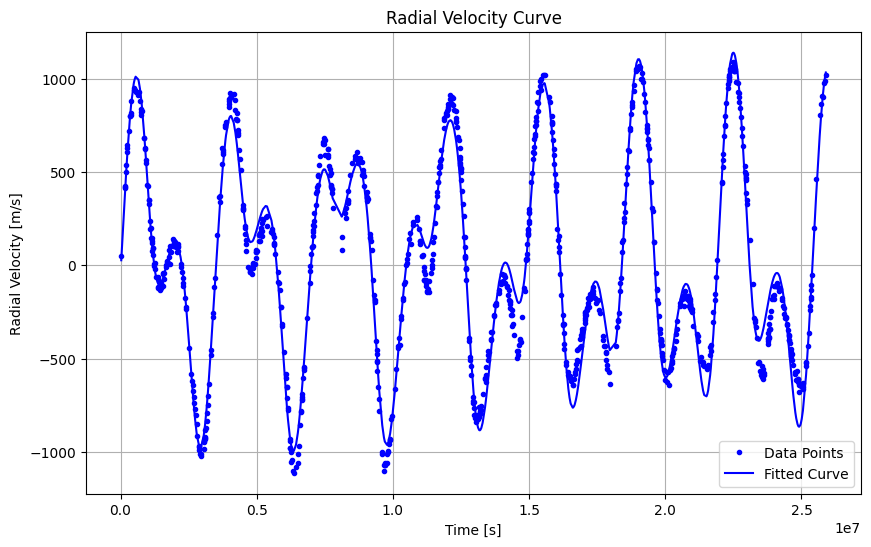

R2 score: 0.9711845166614494



-----Tasks Have Been Completed-----



In [14]:
# Execute the main function
if __name__ == "__main__":
    main()